# OCEAN Token Sentiment Analysis Challenge
## Data Exploration

## import

In [1]:
import os
import sys
from pathlib import Path
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
# from helpers.ocean_helpers import save_list
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

## definitions

In [2]:
path_data = "data"
path_source_prices = os.path.join(path_data, "OCEAN token price dataset.csv")
path_source_tweets = os.path.join(path_data, "OCEAN tweets dataset.csv")

## Load raw data

In [3]:
df_raw_prices = pd.read_csv(path_source_prices)
df_raw_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215
...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566


In [4]:
df_raw_tweets = pd.read_csv(path_source_tweets)
df_raw_tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1583608299085500416,1583289720846618627,2022-10-22 02:56:55 GTB (heure d’été),2022-10-22,02:56:55,300,1265742995636326401,mxyzptlk07,Mxyzptlk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JakeGagain', 'name': 'Jake G...",NaN,NaN,NaN,NaN
1,1583607565543669761,1583607565543669761,2022-10-22 02:54:00 GTB (heure d’été),2022-10-22,02:54:00,300,1265742995636326401,mxyzptlk07,Mxyzptlk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1583603064044367872,1583603064044367872,2022-10-22 02:36:07 GTB (heure d’été),2022-10-22,02:36:07,300,1319369787848405003,moonhodler2,MOONHODLER,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1583598008511664128,1583595613903417344,2022-10-22 02:16:01 GTB (heure d’été),2022-10-22,02:16:01,300,3275094379,rjgaurav338,rikdbxs,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CryptoGemsCom', 'name': 'The...",NaN,NaN,NaN,NaN
4,1583595987851173888,1583557616558833665,2022-10-22 02:07:59 GTB (heure d’été),2022-10-22,02:07:59,300,1258748447873806336,stringerbcoiner,StringerBitcoiner,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'cryptoworld202', 'name': 'Cr...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229852,1211845595977019392,1211774284965859328,2019-12-31 05:04:39 GTB,2019-12-31,05:04:39,300,3307664430,mojo_crypto_btc,🦍🔥 ✧🔮 ጠዐጋዐ ƈཞ ⓨ ℘ɬዐ🔮✧ 🔥🦍 JNGL,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
229853,1211830366513901568,1211782150443479042,2019-12-31 04:04:08 GTB,2019-12-31,04:04:08,300,897905830334533632,harmoniccapital,Harmonic Capital,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DaveCryptos', 'name': 'Dave ...",NaN,NaN,NaN,NaN
229854,1211818209738817536,1211818209738817536,2019-12-31 03:15:50 GTB,2019-12-31,03:15:50,300,999799024273141760,bakeobits,ShillSilverstein.kek 📈👑📉,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
229855,1211808120659300352,1211808120659300352,2019-12-31 02:35:44 GTB,2019-12-31,02:35:44,300,999799024273141760,bakeobits,ShillSilverstein.kek 📈👑📉,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## Clean Data

### Check data

In [5]:
def get_missing(df):
    nb_missing = df.isnull().sum()
    nb_missing = nb_missing.sort_values()
    nb_missing = nb_missing[nb_missing.values > 0]
    print("missing data : ")
    print(nb_missing)
    print("")
    print("on {} samples".format(df.shape[0]))
    return nb_missing


print("Check prices : ")
nb_missing = get_missing(df_raw_prices)

assert len(nb_missing)==0, "NaN value(s) in the prices!"
print("Prices ok")
df_prices = df_raw_prices.copy()

Check prices : 
missing data : 
Series([], dtype: int64)

on 1485 samples
Prices ok


In [6]:
print("Check tweets : ")
nb_missing = get_missing(df_raw_tweets)

Check tweets : 
missing data : 
name                18
thumbnail       172538
quote_url       198764
trans_src       229857
near            229857
geo             229857
source          229857
user_rt_id      229857
user_rt         229857
retweet_id      229857
place           229857
retweet_date    229857
translate       229857
trans_dest      229857
dtype: int64

on 229857 samples


In [7]:
def display_missing(df):
    '''
    Display dataFrame missing values : barplots & numbers
    ouput : dataFrame containing missing numbers
    '''
    nb_lignes = df.shape[0]
    nb_missing = df.isnull().sum()
    nb_missing = nb_missing.sort_values()
    df_missing = nb_missing.to_frame()
    df_missing.rename(index=str, columns={0: "nb_missing"}, inplace=True)
    df_missing["ratio"] = 100*df_missing["nb_missing"] / nb_lignes
    fig = plt.figure(figsize=(7, 7))
    liste_name_bars = df_missing.index.values
    liste_name_bars_num = []
    for name in liste_name_bars:
        liste_name_bars_num.append("{} [{}]".format(
            name, df_missing.loc[name, "nb_missing"]))
    ax = sns.barplot(y=liste_name_bars_num, x='ratio', data=df_missing)
    plt.title('Missing lines Ratio over {} lines'.format(nb_lignes))
    ax.set(xlabel='repartition [%]')
    ax.set_xlim([0, 100])
    return df_missing

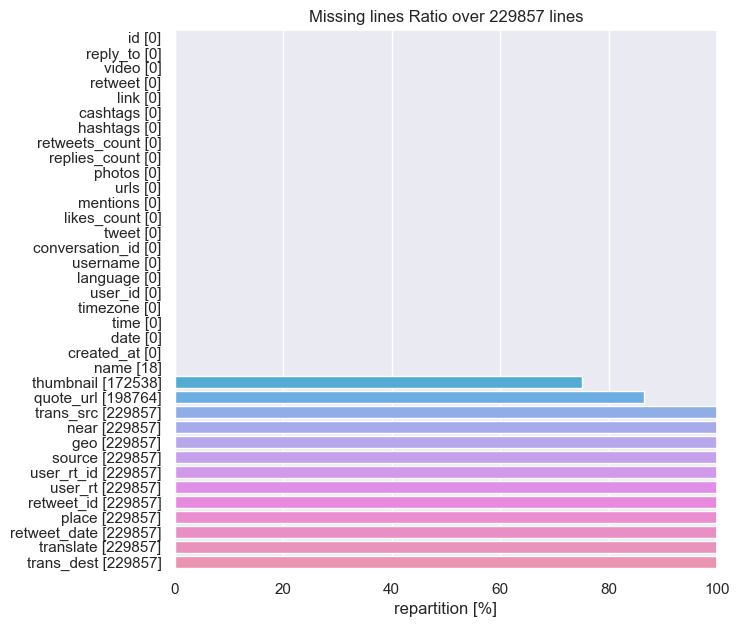

In [8]:
df_miss = display_missing(df_raw_tweets)

First strat, keep only columns where NaN values are < 90% of all values

In [9]:
list_col = df_miss[df_miss["ratio"] < 90].index.to_list()
list_col

['id',
 'reply_to',
 'video',
 'retweet',
 'link',
 'cashtags',
 'hashtags',
 'retweets_count',
 'replies_count',
 'photos',
 'urls',
 'mentions',
 'likes_count',
 'tweet',
 'conversation_id',
 'username',
 'language',
 'user_id',
 'timezone',
 'time',
 'date',
 'created_at',
 'name',
 'thumbnail',
 'quote_url']

In [10]:
df_tweets = df_raw_tweets[list_col].copy()
print("Check tweets : ")
nb_missing = get_missing(df_tweets)



Check tweets : 
missing data : 
name             18
thumbnail    172538
quote_url    198764
dtype: int64

on 229857 samples


In [11]:
df_tweets["quote_url"]

0                                                       NaN
1         https://twitter.com/oceanprotocol/status/15834...
2         https://twitter.com/oceanprotocol/status/15834...
3                                                       NaN
4                                                       NaN
                                ...                        
229852                                                  NaN
229853                                                  NaN
229854                                                  NaN
229855                                                  NaN
229856                                                  NaN
Name: quote_url, Length: 229857, dtype: object

In [12]:
df_tweets["thumbnail"] 

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4         https://pbs.twimg.com/media/FfoQJTUWQAMjfYy.jpg
                               ...                       
229852                                                NaN
229853                                                NaN
229854                                                NaN
229855    https://pbs.twimg.com/media/ENE1D4GUYAAWcVh.jpg
229856                                                NaN
Name: thumbnail, Length: 229857, dtype: object

In [13]:
df_tweets["name"]

0                              Mxyzptlk
1                              Mxyzptlk
2                            MOONHODLER
3                               rikdbxs
4                     StringerBitcoiner
                      ...              
229852    🦍🔥 ✧🔮 ጠዐጋዐ ƈཞ ⓨ ℘ɬዐ🔮✧ 🔥🦍 JNGL
229853                 Harmonic Capital
229854         ShillSilverstein.kek 📈👑📉
229855         ShillSilverstein.kek 📈👑📉
229856                 Tycho Waterhouse
Name: name, Length: 229857, dtype: object

### Time reference

Time reference between Prices & Tweets are not the same : 
- Prices seems to be in timezone UTC : on binance price open at 0.3506 and close 0.3581 on May 28th like data
- Tweet are UTC+3 time zone

We need to translate tweets date to UTC to be synchronized

In [14]:
df_tweets["timezone"].unique()

array([300])

In [15]:
df_tweets["date"]

0         2022-10-22
1         2022-10-22
2         2022-10-22
3         2022-10-22
4         2022-10-22
             ...    
229852    2019-12-31
229853    2019-12-31
229854    2019-12-31
229855    2019-12-31
229856    2019-12-31
Name: date, Length: 229857, dtype: object

In [16]:
df_tweets["link"][0]

'https://twitter.com/Mxyzptlk07/status/1583608299085500416'

In [17]:
df_tweets[df_tweets["date"] == "2022-06-01"].values[60]

array([1531975361663315970, '[]', 0, False,
       'https://twitter.com/hj_majeed7/status/1531975361663315970',
       "['ocean']", '[]', 2, 4, '[]', '[]', '[]', 9,
       '$OCEAN   THIS WEEK CAN BE A BIG WEEK FOR THIS COIN !   5-100% TARGET  SELL AT ANY PROPER PRICE',
       1531975361663315970, 'hj_majeed7', 'en', 1444718496924028942, 300,
       '15:26:03', '2022-06-01', '2022-06-01 15:26:03 GTB (heure d’été)',
       'HJMAJEED', nan, nan], dtype=object)

In [18]:
df_tweets["date"].max()

'2022-10-22'

In [19]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215
...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566


In [20]:
df_tweets.at[0, "date"]

'2022-10-22'

In [21]:
df_tweets.at[0, "time"]

'02:56:55'

In [22]:
date_str = '2023-02-15 16:00:00-05:00'
print(date_str)
date_str = pd.to_datetime(date_str, utc=True).strftime("%Y-%m-%dT%H:%M:%SZ")
print(date_str)

2023-02-15 16:00:00-05:00
2023-02-15T21:00:00Z


In [23]:
def fun_tweets_time(str_date):
    return " " + str_date + "+03:00"


df_tweets["time_utc"] = df_tweets["time"].copy().apply(fun_tweets_time)
df_tweets["time_utc"] = df_tweets["date"].copy() + df_tweets["time_utc"]
df_tweets["time_utc"] = pd.to_datetime(df_tweets["time_utc"], utc=True)
df_tweets["date_utc"] = df_tweets["time_utc"].dt.strftime("%Y-%m-%d")
df_tweets["time_utc"]

0        2022-10-21 23:56:55+00:00
1        2022-10-21 23:54:00+00:00
2        2022-10-21 23:36:07+00:00
3        2022-10-21 23:16:01+00:00
4        2022-10-21 23:07:59+00:00
                    ...           
229852   2019-12-31 02:04:39+00:00
229853   2019-12-31 01:04:08+00:00
229854   2019-12-31 00:15:50+00:00
229855   2019-12-30 23:35:44+00:00
229856   2019-12-30 23:34:52+00:00
Name: time_utc, Length: 229857, dtype: datetime64[ns, UTC]

In [24]:
df_tweets["date_utc"]

0         2022-10-21
1         2022-10-21
2         2022-10-21
3         2022-10-21
4         2022-10-21
             ...    
229852    2019-12-31
229853    2019-12-31
229854    2019-12-31
229855    2019-12-30
229856    2019-12-30
Name: date_utc, Length: 229857, dtype: object

## Calculate the correlation between the price of $OCEAN and the number of tweets containing "$OCEAN". 
What conclusions can be drawn from this correlation?

In [25]:
df_tweets

,id,reply_to,video,retweet,link,cashtags,hashtags,retweets_count,replies_count,photos,...,user_id,timezone,time,date,created_at,name,thumbnail,quote_url,time_utc,date_utc
0,1583608299085500416,"[{'screen_name': 'JakeGagain', 'name': 'Jake G...",0,False,https://twitter.com/Mxyzptlk07/status/15836082...,['ocean'],"['data', 'web3']",0,0,[],...,1265742995636326401,300,02:56:55,2022-10-22,2022-10-22 02:56:55 GTB (heure d’été),Mxyzptlk,NaN,NaN,2022-10-21 23:56:55+00:00,2022-10-21
1,1583607565543669761,[],0,False,https://twitter.com/Mxyzptlk07/status/15836075...,['ocean'],"['datascientists', 'buidl', 'anewdataeconomy']",0,0,[],...,1265742995636326401,300,02:54:00,2022-10-22,2022-10-22 02:54:00 GTB (heure d’été),Mxyzptlk,NaN,https://twitter.com/oceanprotocol/status/15834...,2022-10-21 23:54:00+00:00,2022-10-21
2,1583603064044367872,[],0,False,https://twitter.com/Moonhodler2/status/1583603...,['ocean'],['data'],0,0,[],...,1319369787848405003,300,02:36:07,2022-10-22,2022-10-22 02:36:07 GTB (heure d’été),MOONHODLER,NaN,https://twitter.com/oceanprotocol/status/15834...,2022-10-21 23:36:07+00:00,2022-10-21
3,1583598008511664128,"[{'screen_name': 'CryptoGemsCom', 'name': 'The...",0,False,https://twitter.com/rjgaurav338/status/1583598...,"['ocean', 'bnb', 'eth']",[],0,0,[],...,3275094379,300,02:16:01,2022-10-22,2022-10-22 02:16:01 GTB (heure d’été),rikdbxs,NaN,NaN,2022-10-21 23:16:01+00:00,2022-10-21
4,1583595987851173888,"[{'screen_name': 'cryptoworld202', 'name': 'Cr...",1,False,https://twitter.com/StringerBcoiner/status/158...,"['ocean', 'ltc', 'ngm', 'dafi', 'esek', 'enok'...","['ngm', 'dafi', 'ngm']",0,1,['https://pbs.twimg.com/media/FfoQJTUWQAMjfYy....,...,1258748447873806336,300,02:07:59,2022-10-22,2022-10-22 02:07:59 GTB (heure d’été),StringerBitcoiner,https://pbs.twimg.com/media/FfoQJTUWQAMjfYy.jpg,NaN,2022-10-21 23:07:59+00:00,2022-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229852,1211845595977019392,[],0,False,https://twitter.com/Mojo_Crypto_BTC/status/121...,"['xrp', 'perl', 'nrg', 'ocean']",[],0,0,[],...,3307664430,300,05:04:39,2019-12-31,2019-12-31 05:04:39 GTB,🦍🔥 ✧🔮 ጠዐጋዐ ƈཞ ⓨ ℘ɬዐ🔮✧ 🔥🦍 JNGL,NaN,NaN,2019-12-31 02:04:39+00:00,2019-12-31
229853,1211830366513901568,"[{'screen_name': 'DaveCryptos', 'name': 'Dave ...",0,False,https://twitter.com/harmoniccapital/status/121...,['ocean'],[],0,0,[],...,897905830334533632,300,04:04:08,2019-12-31,2019-12-31 04:04:08 GTB,Harmonic Capital,NaN,NaN,2019-12-31 01:04:08+00:00,2019-12-31
229854,1211818209738817536,[],0,False,https://twitter.com/bakeobits/status/121181820...,"['ins', 'ocean', 'ins']",[],0,2,[],...,999799024273141760,300,03:15:50,2019-12-31,2019-12-31 03:15:50 GTB,ShillSilverstein.kek 📈👑📉,NaN,NaN,2019-12-31 00:15:50+00:00,2019-12-31
229855,1211808120659300352,[],1,False,https://twitter.com/bakeobits/status/121180812...,['ocean'],[],0,2,['https://pbs.twimg.com/media/ENE1D4GUYAAWcVh....,...,999799024273141760,300,02:35:44,2019-12-31,2019-12-31 02:35:44 GTB,ShillSilverstein.kek 📈👑📉,https://pbs.twimg.com/media/ENE1D4GUYAAWcVh.jpg,NaN,2019-12-30 23:35:44+00:00,2019-12-30


### Select data wirh cash tags

In [26]:
def fun_find_cash(list_str):
    return "ocean" in list_str
df_tweets["cash"] = df_tweets["cashtags"].apply(fun_find_cash)
df_tweets["cash"].value_counts()

True     229773
False        84
Name: cash, dtype: int64

### Count nb tweets

In [27]:
df_nb_tweets = df_tweets[df_tweets["cash"] == True][["id", "date_utc"]].groupby("date_utc").count()
df_nb_tweets.rename(columns={"id":"nb_tweets"}, inplace=True)
df_nb_tweets

,nb_tweets
date_utc,
2019-12-30,2
2019-12-31,35
2020-01-01,37
2020-01-02,52
2020-01-03,38
...,...
2022-10-17,156
2022-10-18,686
2022-10-19,273


In [28]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215
...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566


### Add insights about prices

In [29]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215
...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566


In [30]:
df_prices["var"] =( df_prices["Close"]  - df_prices["Open"] ) / df_prices["Open"]
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume,var
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704,-0.011724
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049,0.080856
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657,-0.060236
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438,-0.104483
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215,-0.088462
...,...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755,-0.006180
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463,0.065426
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248,0.012887
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566,0.022471


### merge data

In [31]:
df_nb = df_nb_tweets.merge(df_prices, how='inner', left_index=True, right_on='Date', suffixes=(False, False))
df_nb

,nb_tweets,Date,Open,High,Low,Close,Adj Close,Volume,var
238,2,2019-12-30,0.030096,0.033129,0.029338,0.032726,0.032726,11037407,0.087387
239,35,2019-12-31,0.032700,0.038978,0.032562,0.037197,0.037197,12297226,0.137523
240,37,2020-01-01,0.037197,0.039687,0.034801,0.039226,0.039226,12577450,0.054547
241,52,2020-01-02,0.039209,0.039322,0.034053,0.034784,0.034784,10414026,-0.112857
242,38,2020-01-03,0.034774,0.038628,0.034186,0.036693,0.036693,11271250,0.055185
...,...,...,...,...,...,...,...,...,...
1260,156,2022-10-17,0.150487,0.152528,0.148830,0.152231,0.152231,4791953,0.011589
1261,686,2022-10-18,0.152237,0.199573,0.151643,0.167960,0.167960,86145727,0.103280
1262,273,2022-10-19,0.167924,0.167924,0.160154,0.164779,0.164779,20414280,-0.018729
1263,226,2022-10-20,0.164792,0.167368,0.162250,0.165510,0.165510,10699438,0.004357


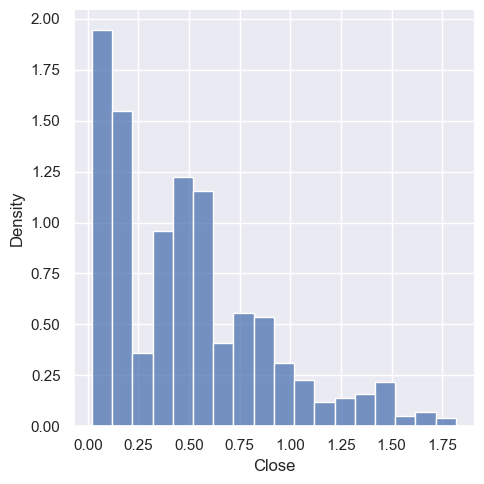

In [32]:
sns.displot(df_nb, x="Close",stat="density")

<AxesSubplot: xlabel='Close'>

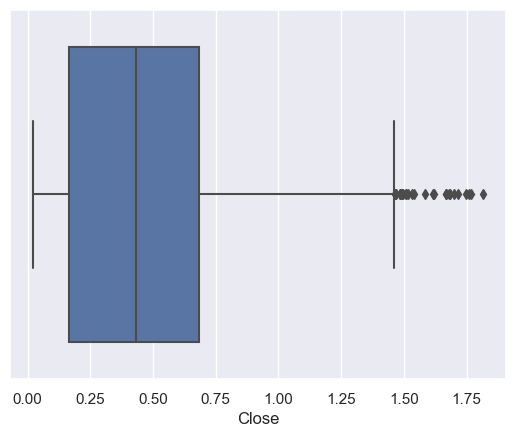

In [33]:
sns.boxplot(x=df_nb["Close"])

<AxesSubplot: xlabel='nb_tweets'>

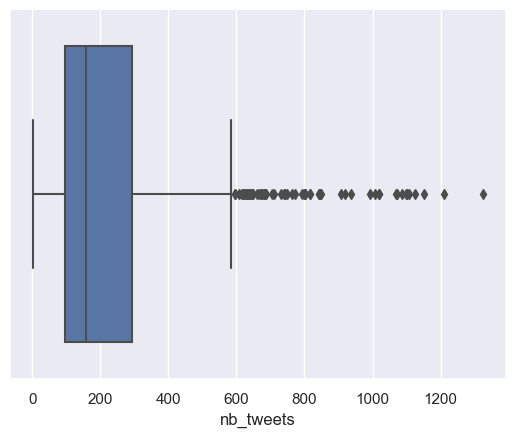

In [34]:
sns.boxplot(x=df_nb["nb_tweets"])

In [35]:
df_nb.describe()

,nb_tweets,Open,High,Low,Close,Adj Close,Volume,var
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1.024000e+03,1024.000000
mean,224.387695,0.486282,0.515553,0.458556,0.486476,0.486476,3.423628e+07,0.004815
std,205.756728,0.389896,0.414562,0.367286,0.389883,0.389883,4.044728e+07,0.077780
min,1.000000,0.019931,0.024722,0.017603,0.020029,0.020029,1.632125e+06,-0.545951
25%,97.000000,0.165172,0.172069,0.159381,0.165168,0.165168,1.278643e+07,-0.038333
50%,157.000000,0.432268,0.454014,0.409697,0.432423,0.432423,2.317279e+07,0.003450
75%,293.250000,0.683909,0.732825,0.627980,0.683721,0.683721,4.386585e+07,0.042506
max,1326.000000,1.818558,1.941328,1.719507,1.817588,1.817588,5.525757e+08,0.550990


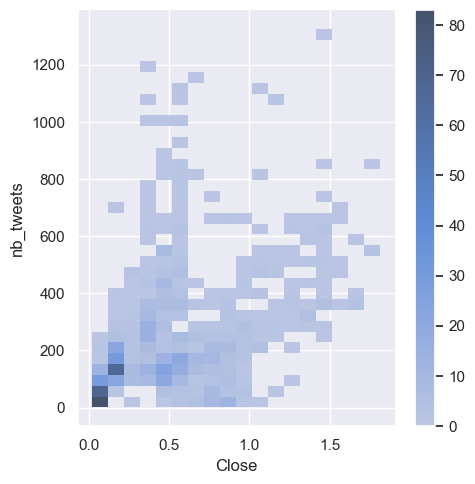

In [36]:
sns.displot(df_nb, x="Close", y="nb_tweets", cbar=True)

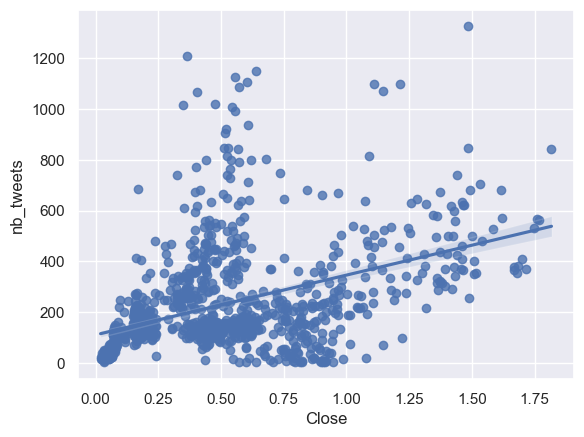

In [37]:
sns.regplot(x="Close", y="nb_tweets", data=df_nb);

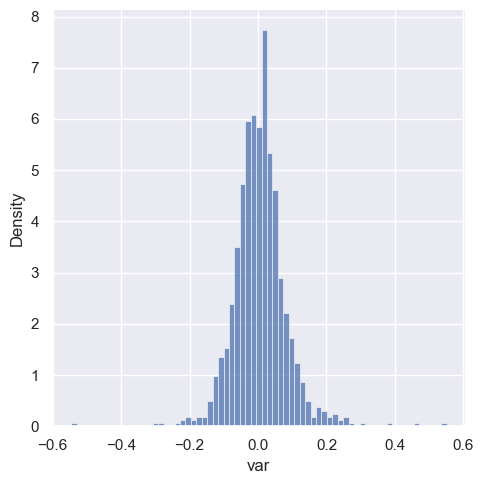

In [42]:
sns.displot(df_nb, x="var",stat="density")

<AxesSubplot: xlabel='var'>

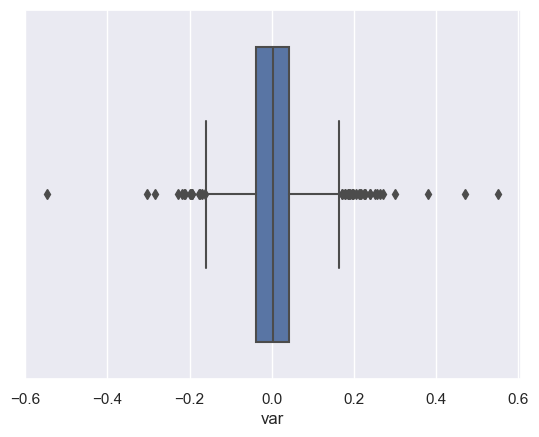

In [41]:
sns.boxplot(x=df_nb["var"])

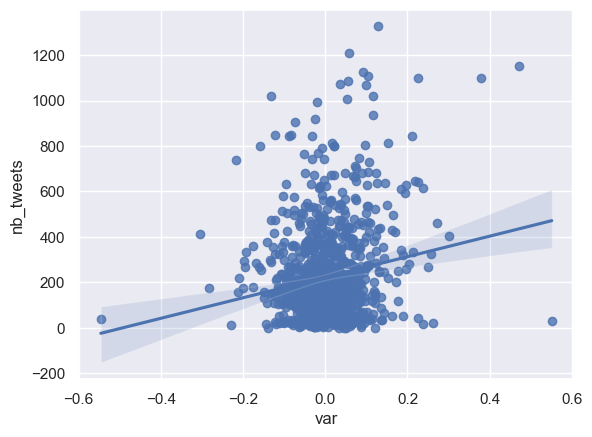

In [39]:
sns.regplot(x="var", y="nb_tweets", data=df_nb);

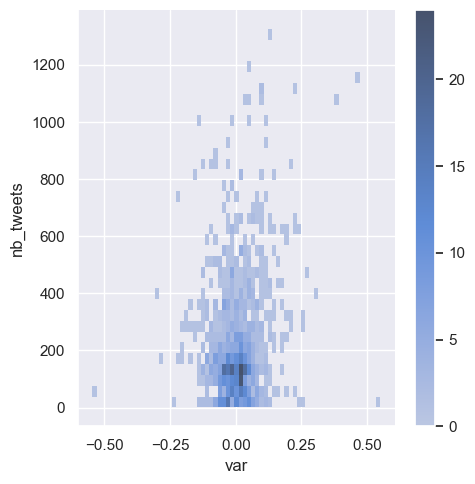

In [40]:
sns.displot(df_nb, x="var", y="nb_tweets", cbar=True)

In [51]:
def fun_level_nb_tweets(nb):
    return str(100*round(nb/100))
df_nb["level"] = df_nb["nb_tweets"].apply(fun_level_nb_tweets)
df_nb

,nb_tweets,Date,Open,High,Low,Close,Adj Close,Volume,var,level
238,2,2019-12-30,0.030096,0.033129,0.029338,0.032726,0.032726,11037407,0.087387,0
239,35,2019-12-31,0.032700,0.038978,0.032562,0.037197,0.037197,12297226,0.137523,0
240,37,2020-01-01,0.037197,0.039687,0.034801,0.039226,0.039226,12577450,0.054547,0
241,52,2020-01-02,0.039209,0.039322,0.034053,0.034784,0.034784,10414026,-0.112857,100
242,38,2020-01-03,0.034774,0.038628,0.034186,0.036693,0.036693,11271250,0.055185,0
...,...,...,...,...,...,...,...,...,...,...
1260,156,2022-10-17,0.150487,0.152528,0.148830,0.152231,0.152231,4791953,0.011589,200
1261,686,2022-10-18,0.152237,0.199573,0.151643,0.167960,0.167960,86145727,0.103280,700
1262,273,2022-10-19,0.167924,0.167924,0.160154,0.164779,0.164779,20414280,-0.018729,300
1263,226,2022-10-20,0.164792,0.167368,0.162250,0.165510,0.165510,10699438,0.004357,200


In [52]:
df_nb["level"].unique()

array(['0', '100', '200', '300', '500', '400', '600', '1200', '1100',
       '800', '1000', '900', '700', '1300'], dtype=object)

<AxesSubplot: xlabel='var', ylabel='level'>

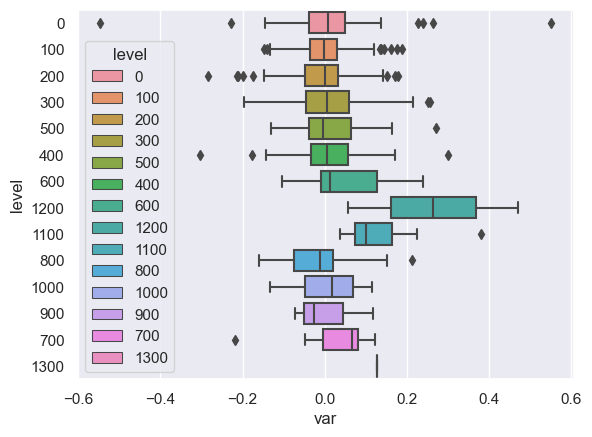

In [53]:
#sns.boxplot(data=df_nb, x="var", y="level")
sns.boxplot(data=df_nb, x="var", y="level", hue="level", dodge=False)
